# A Multivariate Regression Model for Life Expectancy Prediction

### __Made by [Ahmad Shafique](https://www.linkedin.com/in/ahmadshafique443)__ 

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Loading Life Expectancy Dataset

In [2]:
Life_Expectancy_data = pd.read_csv('Life Expectancy Data.csv')
Life_Expectancy_data.drop(columns='Country', axis=1, inplace=True)
Life_Expectancy_data.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Exploring Dataset

In [3]:
Life_Expectancy_data.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
Life_Expectancy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [5]:
Life_Expectancy_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
Life_Expectancy_data.shape

(2938, 21)

## Working with null values

In [7]:
Life_Expectancy_data.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

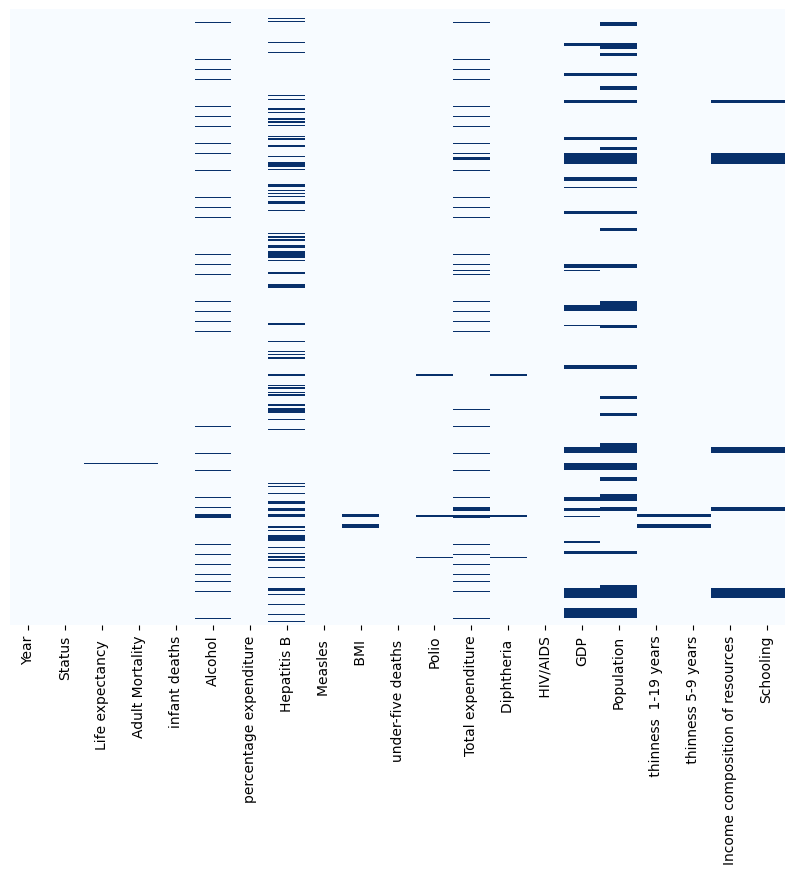

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(Life_Expectancy_data.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

In [9]:
Life_Expectancy_data['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [10]:
Life_Expectancy_data['Status'].replace({'Developing':0, 'Developed':1}, inplace=True)

### since all the data is continuous, so we will be replacing null values by mean

In [11]:
Life_Expectancy_data = Life_Expectancy_data.apply(lambda x: x.fillna(x.mean()),axis=0)

In [12]:
Life_Expectancy_data.isna().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## Having a look at correlation to select independent features

In [13]:
corr = Life_Expectancy_data.corr().reset_index()
#corr['index']
corr[corr['index'] =='Life expectancy ']

,index,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2,Life expectancy,0.169623,0.481962,1.0,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066


In [14]:
correlated_features = ['index', 'Status', 'Adult Mortality', 'Alcohol', ' BMI ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
updated_corr = corr[correlated_features][corr[correlated_features]['index'] =='Life expectancy ']
updated_corr

,index,Status,Adult Mortality,Alcohol,BMI,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2,Life expectancy,0.481962,-0.696359,0.391598,0.559255,0.461574,0.475418,-0.556457,0.430493,-0.472162,-0.466629,0.692483,0.715066


## Time to do some visualization

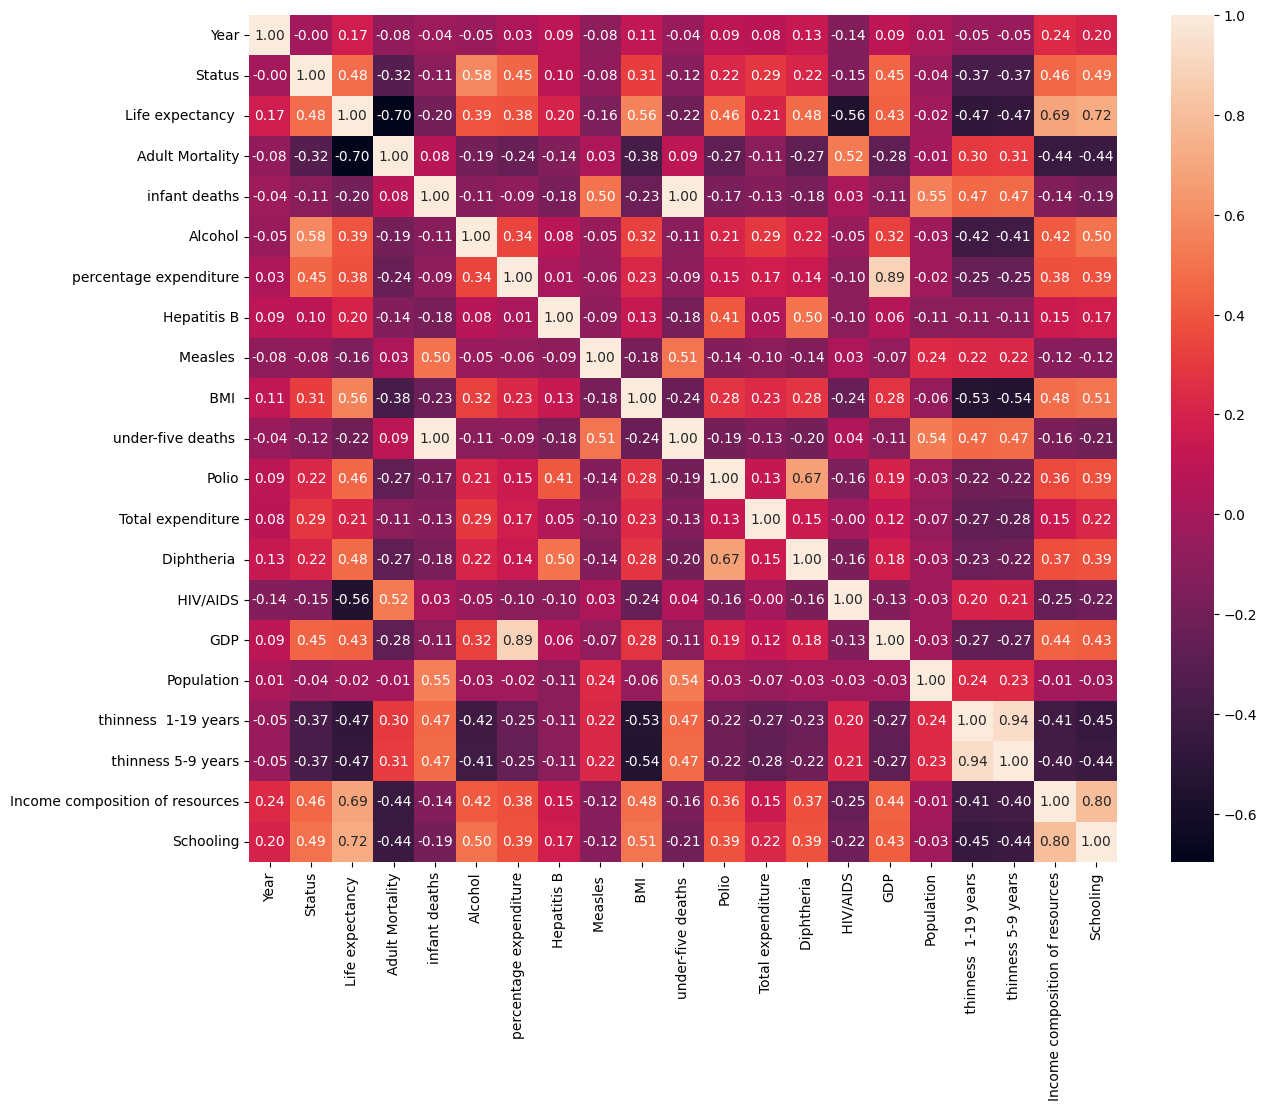

In [15]:
plt.figure(figsize=(14,11))
sns.heatmap(Life_Expectancy_data.corr(), annot=True, fmt='.2f')
plt.show()

## Having a look at highly correlated features

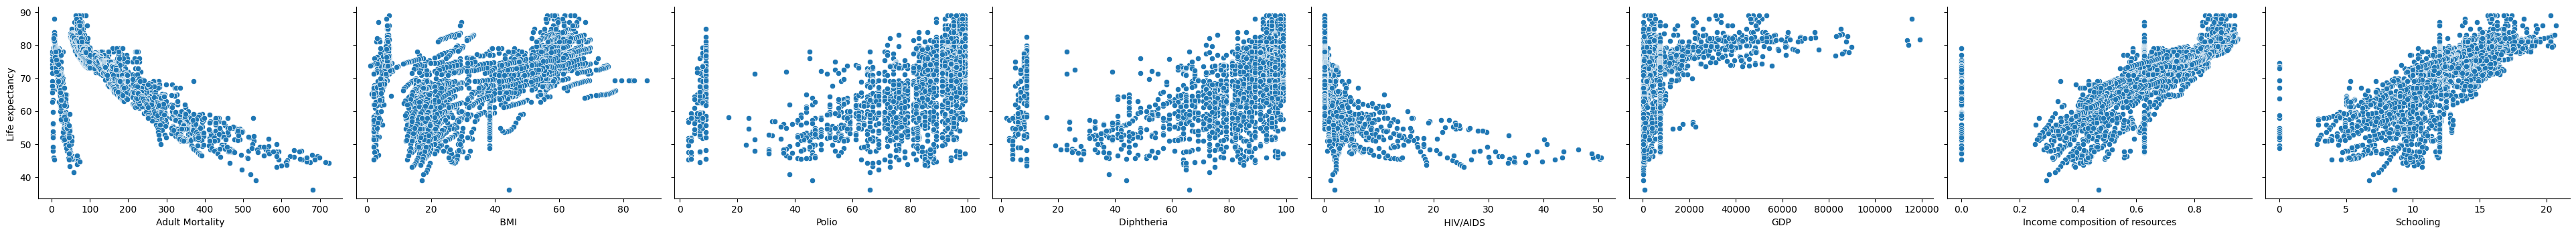

In [16]:
correlated_features = ['Adult Mortality', ' BMI ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Income composition of resources', 'Schooling']
sns.pairplot(data=Life_Expectancy_data, x_vars=correlated_features, y_vars='Life expectancy ', height=3.5, aspect=1.4)
plt.show()

## Choosing Independent and Dependent features

In [17]:
X=Life_Expectancy_data[['Adult Mortality', ' BMI ', ' HIV/AIDS', 'GDP',
       'Income composition of resources', 'Schooling']]
y=Life_Expectancy_data[['Life expectancy ']]

## Splitting the data for test and testing purposes

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=12)

## Fitting a Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model = LR.fit(X, y)

## Linear Reression Model Parameters

In [20]:
print(model.coef_)
print(model.intercept_)

[[-2.18495630e-02  6.38425569e-02 -4.81832744e-01  5.61876710e-05
   7.58967270e+00  8.83145740e-01]]
[55.44378591]


## predicting Life Expectancy of Test set

In [21]:
y_pred = model.predict(X_test)

## Evaluating the accuracy of our model using various metrics

In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r_squared = r2_score(y_test, y_pred)
adjusted_r_squared = 1 - ((1 - r_squared) * (735 - 1) / (735 - 6 - 1))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print('R-squared value :', round(r_squared, 4))
print('Adjusted R-squared value :', round(adjusted_r_squared, 4))
print('Mean square error is :', round(mse, 2))
print('Root mean square error is :', round(rmse, 2))
print('Mean absolute error is :', round(mae, 2))

R-squared value : 0.8034
Adjusted R-squared value : 0.8018
Mean square error is : 18.92
Root mean square error is : 4.35
Mean absolute error is : 3.18


## Visual representation of actual Life Expectancy and our predicted Life Expectancy

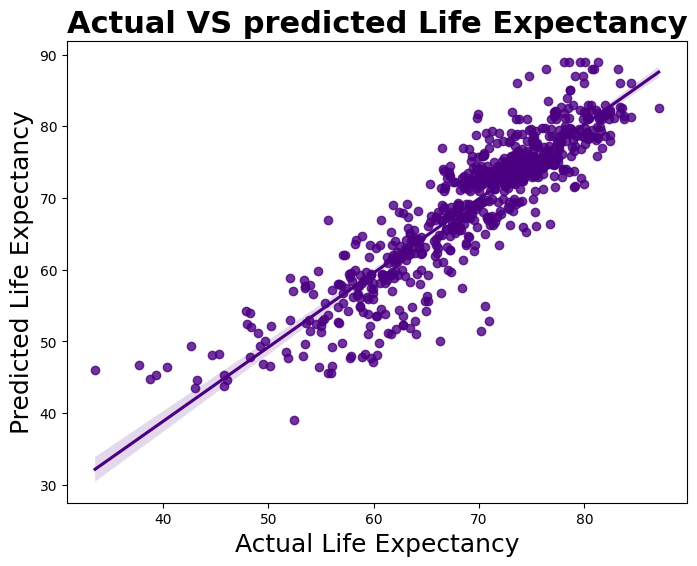

In [23]:
plt.figure(figsize=(8,6))
sns.regplot(y=y_test, x=y_pred, color='indigo')
plt.xlabel('Actual Life Expectancy', fontdict={'fontsize':18})
plt.ylabel('Predicted Life Expectancy', fontdict={'fontsize':18})
plt.title('Actual VS predicted Life Expectancy', fontdict={'fontweight':'bold', 'fontsize':22})
plt.show()